## Solving the ROOKS problem using Z3


The ROOKS problem is a classic combinatorial puzzle in constraint satisfaction problems. The objective is to place $N$ Rooks on an $N \times N$ chessboard so that
no two rooks are attacking each other (i.e., no two rooks are in the same row or column). For example, here's a solution on a $8 \times 8$ board:

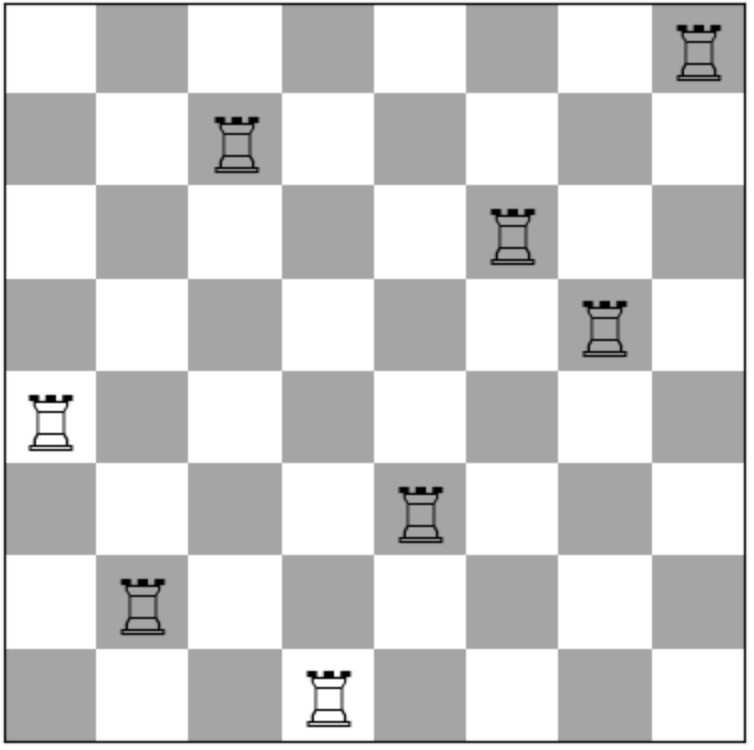

Let's see how we can construct an SMT solver for the ROOKS problem on $3 \times 3$ board. We will make a variable, $x_{ij}$, for each cell $(i,j)$ (corresponding to the $i$th row and $j$th column) in the chessboard that is true if and only if a rook is placed in that cell.

In [ ]:
s = Solver() # initialize solver

# initialize variables
x11 = Bool('x_{11}')
x12 = Bool('x_{12}')
x13 = Bool('x_{13}')
x21 = Bool('x_{21}')
x22 = Bool('x_{22}')
x23 = Bool('x_{23}')
x31 = Bool('x_{31}')
x32 = Bool('x_{32}')
x33 = Bool('x_{33}')

# each row should have exactly one rook
s.add( x11 + x12 + x13 == 1 )
s.add( x21 + x22 + x23 == 1 )
s.add( x31 + x32 + x33 == 1 )

# each column should have exactly one rook
s.add( x11 + x21 + x31 == 1 )
s.add( x12 + x22 + x32 == 1 )
s.add( x13 + x23 + x33 == 1 )

showSolver( s )
print( s.check() )
print( s.model() )

To view our solution, we have defined a function that prints out the chessboard with the positions returned by the solver:

In [ ]:
s.check()
solution = s.model()
draw_chessboard_with_rooks( 3, solution )
# the function above takes into input the size of the chessboard and the solution given by s.model()

If there are multiple solutions and we want to obtain a different one we can encode our solver to avoid the previous solution. For example:

In [ ]:
# we will simply add a constraint saying that we should not have all of the same
# variable assignments we had in the previous solution
s.add( Not( And(x11 == solution[x11],
               x12 == solution[x12],
               x13 == solution[x13],
               x21 == solution[x21],
               x22 == solution[x22],
               x23 == solution[x23],
               x31 == solution[x31],
               x32 == solution[x32],
               x33 == solution[x33]) ) )
showSolver(s)
s.check()
solution2 = s.model()
draw_chessboard_with_rooks( 3, solution2 )

We can do this repeatedly to enumerate over all solutions. A function has been defined above to do this.

In [ ]:
# Since we have edited the solver, we have to reinitialize it before passing it to
# our function that goes through all solutions

# initialize solver
s = Solver()
# initialize variables
x11, x12, x13, x21, x22, x23, x31, x32, x33 = Bools('x_{11} x_{12} x_{13} x_{21} x_{22} x_{23} x_{31} x_{32} x_{33}')
all_variables = [x11, x12, x13, x21, x22, x23, x31, x32, x33]
s.add( x11 + x12 + x13 == 1 )
s.add( x21 + x22 + x23 == 1 )
s.add( x31 + x32 + x33 == 1 )
s.add( x11 + x21 + x31 == 1 )
s.add( x12 + x22 + x32 == 1 )
s.add( x13 + x23 + x33 == 1 )

all_solutions = list_all_solutions( s, all_variables )

In [ ]:
# Check how many solutions there are
print( len( all_solutions ) )

In [ ]:
# View each solution:
draw_multiple_chessboards_with_rooks( 3, all_solutions )

###Now it's your turn! Complete the code below to encode the ROOKS problem for a $4 \times 4$ board and find each solution. There should be $24$ solutions.

Once you are done, don't forget to use the output_string() function in the next cell to generate the string you are supposed to submit in your homework submission.

In [ ]:
s = Solver() # initialize solver

# initialize variables
x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34, x41, x42, x43, x44 = Bools('x_{11} x_{12} x_{13} x_{14} x_{21} x_{22} x_{23} x_{24} x_{31} x_{32} x_{33} x_{34} x_{41} x_{42} x_{43} x_{44}')
all_variables = [x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34, x41, x42, x43, x44]

# each row should have exactly one rook
s.add( x11 + x12 + x13 + x14 == 1 )
## ADD YOUR CODE HERE

# each column should have exactly one rook
s.add( x11 + x21 + x31 + x41 == 1 )
## ADD YOUR CODE HERE

showSolver( s )

# Obtain all solutions
all_solutions = list_all_solutions( s, all_variables )

print( "Number of solutions: ", len( all_solutions ) )

draw_multiple_chessboards_with_rooks( 4, all_solutions )


In [ ]:
# run this cell and copy-paste the output string into your homework submission
rooks_output_string( all_solutions )